In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

In [4]:
df.sample(5)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
332,Osteoporosis,Yes,No,No,No,70,Male,Normal,Normal,Negative
289,Hepatitis B,No,Yes,Yes,No,60,Male,Normal,Low,Positive
299,Parkinson's Disease,Yes,Yes,No,No,60,Male,High,Normal,Positive
197,Pneumonia,Yes,Yes,Yes,Yes,45,Male,High,High,Positive
83,Kidney Cancer,No,No,Yes,No,35,Male,High,High,Positive


In [5]:
# Checking Data Types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
Disease                 349 non-null object
Fever                   349 non-null object
Cough                   349 non-null object
Fatigue                 349 non-null object
Difficulty Breathing    349 non-null object
Age                     349 non-null int64
Gender                  349 non-null object
Blood Pressure          349 non-null object
Cholesterol Level       349 non-null object
Outcome Variable        349 non-null object
dtypes: int64(1), object(9)
memory usage: 27.3+ KB


In [6]:
#checking for null values
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [7]:
# What is the size of dataset
df.shape

(349, 10)

In [8]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [9]:
#let's check for number of unique values
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [10]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


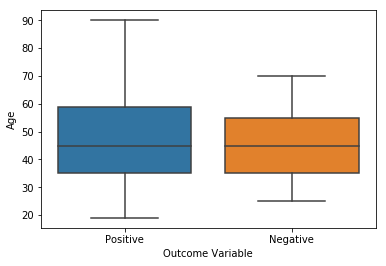

In [11]:
sns.boxplot(x='Outcome Variable', y='Age', data=df)
plt.show()

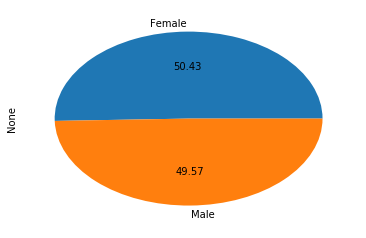

In [12]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

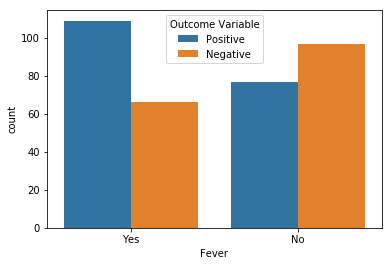

In [13]:
sns.countplot(x='Fever', data=df, hue='Outcome Variable')
plt.show()

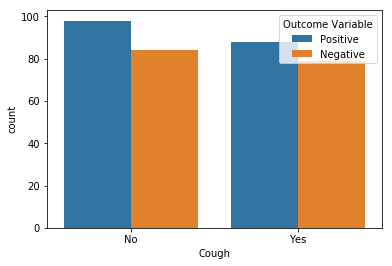

In [14]:
sns.countplot(x='Cough', data=df, hue='Outcome Variable')
plt.show()

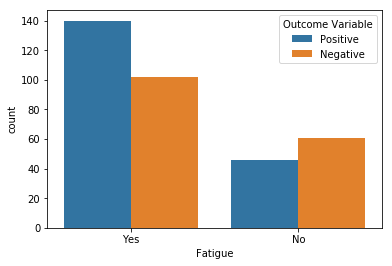

In [15]:
sns.countplot(x='Fatigue', data=df, hue='Outcome Variable')
plt.show()

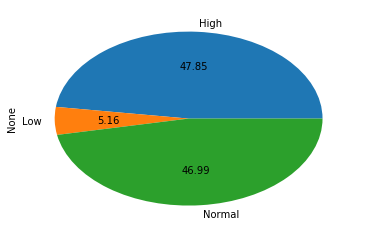

In [16]:
df.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')

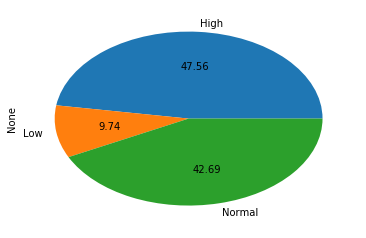

In [17]:
df.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')

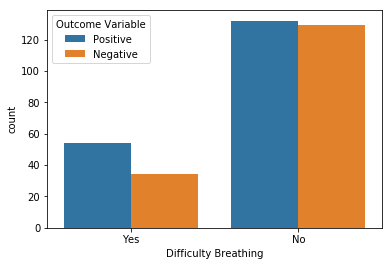

In [18]:
sns.countplot(x='Difficulty Breathing', data=df, hue='Outcome Variable')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Convert categorical variables to dummy variables
df_ml = pd.get_dummies(df, columns=['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level'], drop_first=True)

In [21]:
# Define features and target variable
X_ml = df_ml.drop(columns=['Disease', 'Outcome Variable'])
y_ml = df_ml['Outcome Variable']

In [22]:
# Split data into training and testing sets
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [25]:
# Fit and transform the target variable
y_train_ml_encoded = label_encoder.fit_transform(y_train_ml)
y_test_ml_encoded = label_encoder.transform(y_test_ml)

In [26]:
# Initialize and train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train_ml, y_train_ml_encoded)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Predict outcomes
y_pred_ml_encoded = mlr_model.predict(X_test_ml)

In [28]:
# Convert predicted probabilities to binary predictions
y_pred_ml_encoded[y_pred_ml_encoded > 0.5] = 1
y_pred_ml_encoded[y_pred_ml_encoded <= 0.5] = 0

In [29]:
# Evaluate the model
accuracy_ml_encoded = accuracy_score(y_test_ml_encoded, y_pred_ml_encoded)
print("Accuracy of MLR model with label encoding:", accuracy_ml_encoded)
print("Classification Report:")
print(classification_report(y_test_ml_encoded, y_pred_ml_encoded))

Accuracy of MLR model with label encoding: 0.5714285714285714
Classification Report:
             precision    recall  f1-score   support

          0       0.50      0.53      0.52        30
          1       0.63      0.60      0.62        40

avg / total       0.58      0.57      0.57        70



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# Define features and target variable
X_dt = df.drop(columns=['Disease', 'Outcome Variable'])
y_dt = df['Outcome Variable']

In [32]:
# Convert categorical variables to dummy variables
X_dt = pd.get_dummies(X_dt, drop_first=True)

In [33]:
# Split data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [34]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [35]:
# Predict outcomes
y_pred_dt = dt_model.predict(X_test_dt)

In [36]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Accuracy of Decision Tree model:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

Accuracy of Decision Tree model: 0.7285714285714285
Classification Report:
             precision    recall  f1-score   support

   Negative       0.64      0.83      0.72        30
   Positive       0.84      0.65      0.73        40

avg / total       0.75      0.73      0.73        70

